In [3]:
# Import packages
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from util import *
from filter_design import *
from feature_detection import *
import scipy.signal as sgn
from ipywidgets import interact, interactive, fixed
from IPython.display import display

# Encontrando um período do ECG

## Usando correlação cruzada
Nessa seção será usada a autocorrelação para encontrar um período do eletrocardiograma

### Mostra gráfico de um ECG


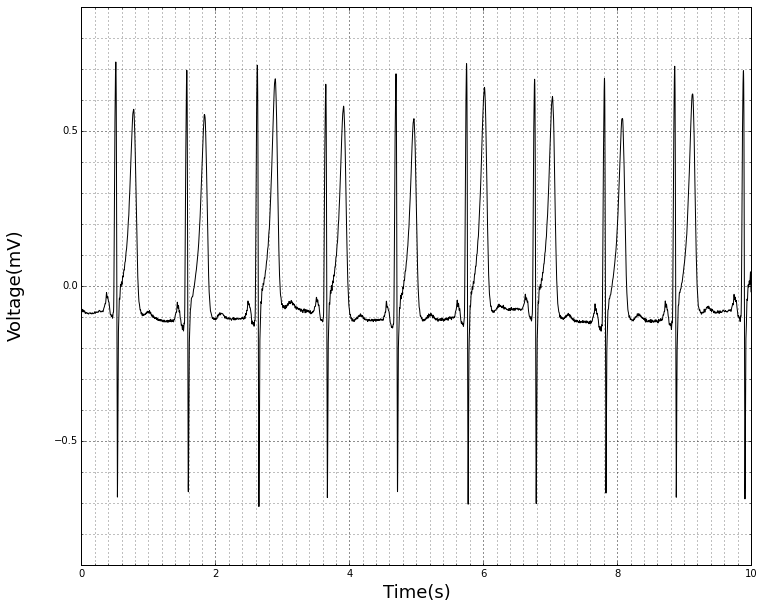

In [56]:
# Get signal
x, fs = get_signal(177,4)

fs = 2*fs
x = sgn.resample(x, 2*len(x))

# get cutoff frequency
fc = 60
wc = fc/(fs/2)
# another filter caracteristics
rp = 0.3
rs = 100
# Get eliptic coeficients
b, a = sgn.ellip(12, rp, rs, wc)
x = sgn.filtfilt(b, a, x)

np.savez_compressed("sample3.npz", x=x, fs=fs)

plot_signal(x, fs)

### Usa sequencia de autocorrelação para achar período

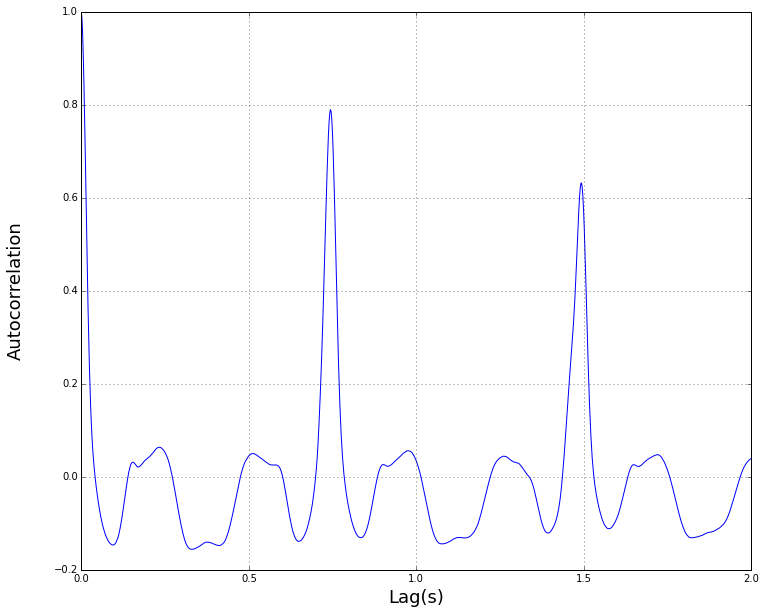

In [119]:
plot_crosscorr(x, fs)

period, min_period=find_ecgperiod(x,fs)

# Destacando o complexo QRS
O seguinte método é utilizado para destacar o complexo QRS: primeiro é aplicada a primeira 
difereça e depois é aplicada a transformada Hilbert.

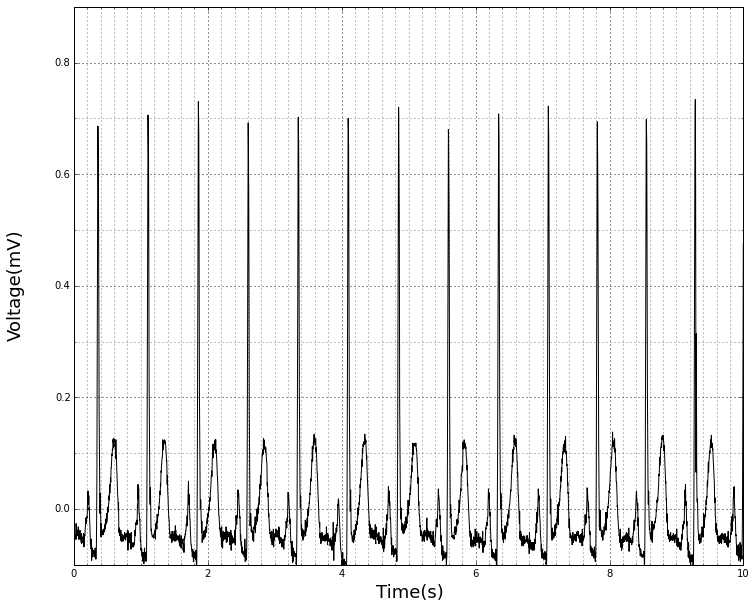

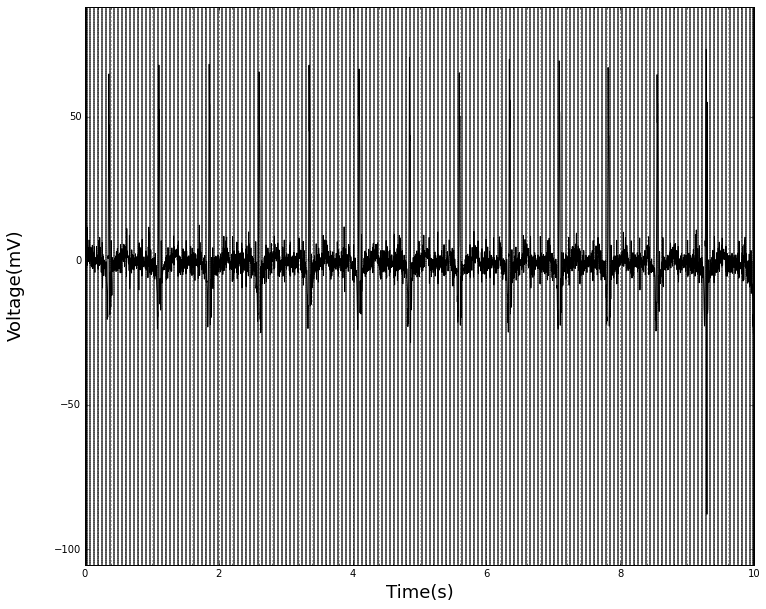

In [120]:
xe = enhance_ecg(x, fs)
plot_signal(x, fs)
plot_signal(xe, fs)

# Encontrando os picos R
Usa o sinal destacado, juntamente com as informações sobre o período, para encontrar
picos R

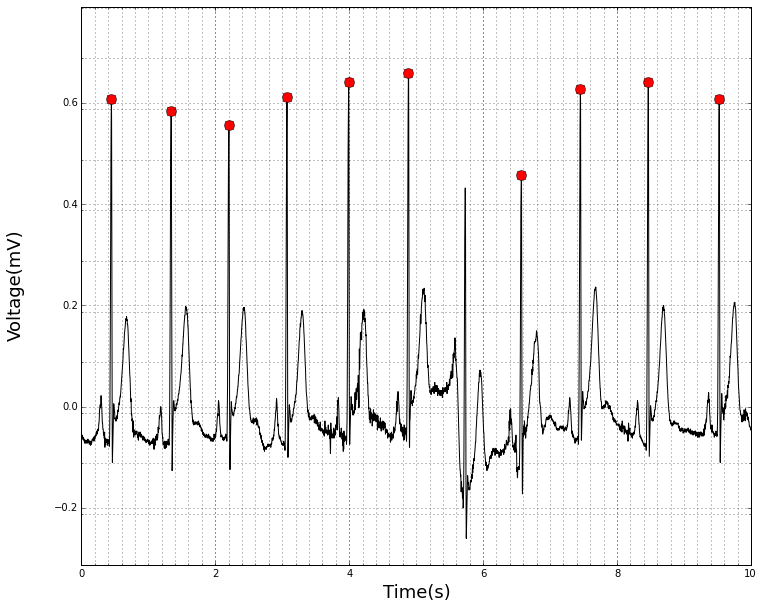

In [116]:
peaks = find_Rwave(x, xe, fs, period, min_period)

plot_peaks(x, fs, peaks)

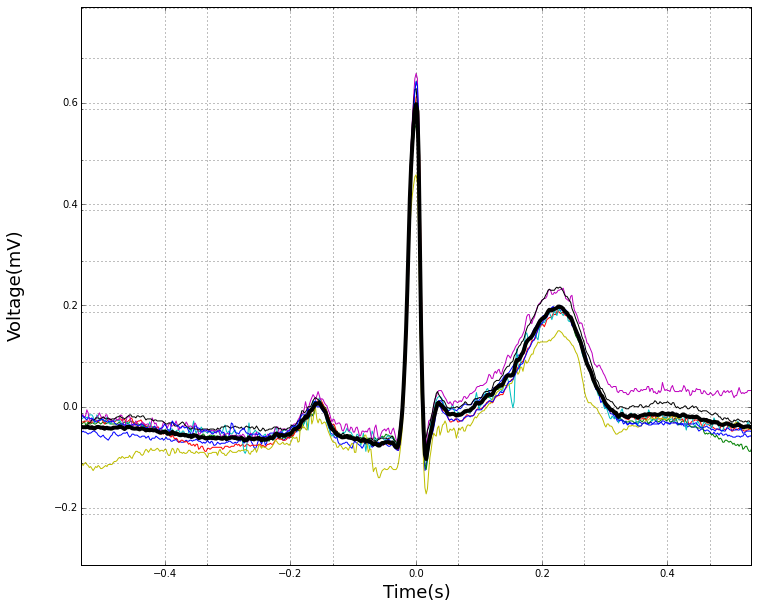

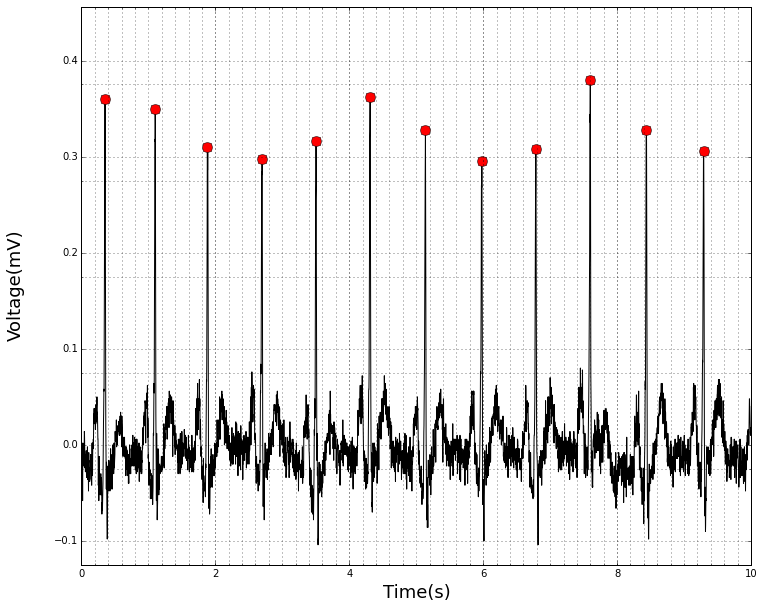

In [41]:
x, fs = get_signal(2,1)
period, min_period=find_ecgperiod(x,fs)
xe = enhance_ecg(x, fs)
peaks = find_Rwave(x, xe, fs, period, min_period)
plot_peaks(x, fs, peaks)

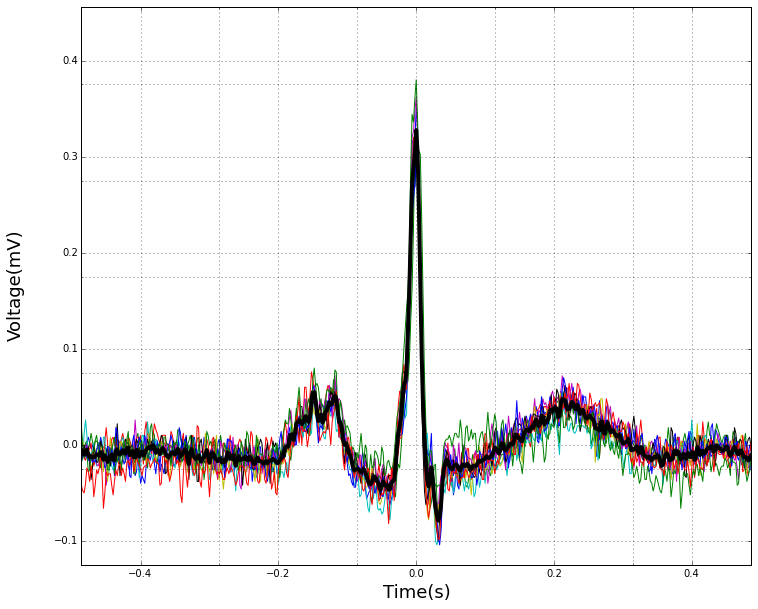

In [42]:
interval = subdivide_ecg(x, fs, peaks, period)
plot_entangled_signal(x, fs, interval, period)